# 1. Import required libraries

In [1]:
import numpy as np
from datetime import date
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from scipy import stats
from sklearn.cluster import KMeans
from scipy.stats import zscore
from scipy.spatial import distance
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

# 2. Load the CSV file (i.e marketing.csv) and display the first 5 rows of the dataframe. Check the shape and info of the dataset.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/marketing.csv')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,4/9/2012,58,635,...,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,8/3/2014,38,11,...,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,10/2/2014,26,11,...,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,3,6,5,0,0,0,0,0,0,0


In [4]:
df.shape

(2240, 27)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

3. Check the percentage of missing values? If there is presence of missing values, treat them accordingly.

In [6]:
df.isnull().sum()/len(df)*100

ID                     0.000000
Year_Birth             0.000000
Education              0.000000
Marital_Status         0.000000
Income                 1.071429
Kidhome                0.000000
Teenhome               0.000000
Dt_Customer            0.000000
Recency                0.000000
MntWines               0.000000
MntFruits              0.000000
MntMeatProducts        0.000000
MntFishProducts        0.000000
MntSweetProducts       0.000000
MntGoldProds           0.000000
NumDealsPurchases      0.000000
NumWebPurchases        0.000000
NumCatalogPurchases    0.000000
NumStorePurchases      0.000000
NumWebVisitsMonth      0.000000
AcceptedCmp3           0.000000
AcceptedCmp4           0.000000
AcceptedCmp5           0.000000
AcceptedCmp1           0.000000
AcceptedCmp2           0.000000
Complain               0.000000
Response               0.000000
dtype: float64

income is having missing values, and fillling those values with mean values

In [7]:
df['Income'].fillna(df['Income'].mean(), inplace=True)

In [8]:
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Response               0
dtype: int64

# 4. Check if there are any duplicate records in the dataset? If any drop them.

In [9]:
len(df[df.duplicated()])

0

# 5. Drop the columns which you think redundant for the analysis

In [10]:
df = df.drop(columns = ['ID', 'Dt_Customer'], axis=1)

# 6. Check the unique categories in the column 'Marital_Status'
i) Group categories 'Married', 'Together' as 'relationship'

ii) Group categories 'Divorced', 'Widow', 'Alone', 'YOLO', and 'Absurd' as 'Single'.

In [11]:
df['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [12]:
df['Marital_Status'] = df['Marital_Status'].replace(['Married', 'Together'], 'relationship')
df['Marital_Status'] = df['Marital_Status'].replace(['Divorced', 'Widow', 'YOLO', 'Absurd', 'Alone', 'single'], 'Single')

In [13]:
df['Marital_Status'].unique()

array(['Single', 'relationship'], dtype=object)

# 7. Group the columns 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', and 'MntGoldProds' as 'Total_Expenses'

In [14]:
df['Total_Expenses'] = df['MntWines']+df['MntFruits']+df['MntMeatProducts']+df['MntFishProducts']+df['MntSweetProducts']+df['MntGoldProds']
df['Total_Expenses'].head()

0    1617
1      27
2     776
3      53
4     422
Name: Total_Expenses, dtype: int64

# 8. Group the columns 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', and 'NumDealsPurchases' as 'Num_Total_Purchases'

In [15]:
df['Num_Total_Purchases'] = df['NumWebPurchases']+df['NumCatalogPurchases']+df['NumStorePurchases']+df['NumDealsPurchases']
df['Num_Total_Purchases'].head()

0    25
1     6
2    21
3     8
4    19
Name: Num_Total_Purchases, dtype: int64

# 9. Group the columns 'Kidhome' and 'Teenhome' as 'Kids'

In [16]:
df['Kids'] = df['Kidhome']+df['Teenhome']
df['Kids'].head()

0    0
1    2
2    0
3    1
4    1
Name: Kids, dtype: int64

# 10. Group columns 'AcceptedCmp1 , 2 , 3 , 4, 5' and 'Response' as 'TotalAcceptedCmp'

In [17]:
df['TotalAcceptedCmp'] = df['AcceptedCmp1']+df['AcceptedCmp2']+df['AcceptedCmp3']+df['AcceptedCmp4']+df['AcceptedCmp5']+df['Response']
df['TotalAcceptedCmp'].head()

0    1
1    0
2    0
3    0
4    0
Name: TotalAcceptedCmp, dtype: int64

# 11. Drop those columns which we have used above for obtaining new features

In [18]:
cols = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'Kidhome', 'Teenhome', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumDealsPurchases', 'NumWebVisitsMonth', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
df = df.drop(columns=cols, axis=1)
df.head()

,Year_Birth,Education,Marital_Status,Income,Recency,Complain,Total_Expenses,Num_Total_Purchases,Kids,TotalAcceptedCmp
0,1957,Graduation,Single,58138.0,58,0,1617,25,0,1
1,1954,Graduation,Single,46344.0,38,0,27,6,2,0
2,1965,Graduation,relationship,71613.0,26,0,776,21,0,0
3,1984,Graduation,relationship,26646.0,26,0,53,8,1,0
4,1981,PhD,relationship,58293.0,94,0,422,19,1,0


# 12. Extract 'age' using the column 'Year_Birth' and then drop the column 'Year_birth'

In [19]:
df['age'] = date.today().year - df['Year_Birth']
df.drop('Year_Birth', axis=1, inplace=True)
df.head()

,Education,Marital_Status,Income,Recency,Complain,Total_Expenses,Num_Total_Purchases,Kids,TotalAcceptedCmp,age
0,Graduation,Single,58138.0,58,0,1617,25,0,1,65
1,Graduation,Single,46344.0,38,0,27,6,2,0,68
2,Graduation,relationship,71613.0,26,0,776,21,0,0,57
3,Graduation,relationship,26646.0,26,0,53,8,1,0,38
4,PhD,relationship,58293.0,94,0,422,19,1,0,41


# 13. Encode the categorical variables in the dataset

In [20]:
categories = ['Education', 'Marital_Status']
lbl_encoder = LabelEncoder()
for i in categories:
    df[i] = df[[i]].apply(lbl_encoder.fit_transform)

In [21]:
df[['Education', 'Marital_Status']].head()

,Education,Marital_Status
0,2,0
1,2,0
2,2,1
3,2,1
4,4,1


# 14. Standardize the columns, so that values are in a particular range

In [22]:
df1 = df.copy()
scaled_features = StandardScaler().fit_transform(df1.values)
scaled_features_df = pd.DataFrame(scaled_features, index=df1.index, columns=df1.columns)

# 15. Apply PCA on the above dataset and determine the number of PCA components to be used so that 90-95% of the variance in data is explained by the same.

In [23]:
#Step1: Calculate the covariance matrix
cov_matrix = np.cov(scaled_features.T)
cov_matrix

array([[ 1.00044663, -0.01375403,  0.1200273 , -0.01173369, -0.05056252,
         0.09209518,  0.09405439,  0.05321304,  0.06327892,  0.17146685],
       [-0.01375403,  1.00044663,  0.00463847, -0.00450972, -0.00520466,
        -0.01775232,  0.00671037,  0.03917598, -0.06004206, -0.0042384 ],
       [ 0.1200273 ,  0.00463847,  1.00044663, -0.00394826, -0.02723528,
         0.66500337,  0.5636214 , -0.29084155,  0.28717443,  0.16101378],
       [-0.01173369, -0.00450972, -0.00394826,  1.00044663,  0.01323699,
         0.02044173,  0.00574294,  0.01806145, -0.08900203,  0.01987996],
       [-0.05056252, -0.00520466, -0.02723528,  0.01323699,  1.00044663,
        -0.03707503, -0.02059185,  0.03108014, -0.01761676,  0.030141  ],
       [ 0.09209518, -0.01775232,  0.66500337,  0.02044173, -0.03707503,
         1.00044663,  0.75423984, -0.49911047,  0.4564099 ,  0.11135611],
       [ 0.09405439,  0.00671037,  0.5636214 ,  0.00574294, -0.02059185,
         0.75423984,  1.00044663, -0.24589955

In [24]:
#Step2: Calculate the eigen values and vectors
eig_vals, eig_vectors = np.linalg.eig(cov_matrix)
print('Eigen values:', '\n', eig_vals)
print('\n')
print('Eigen vectors:', '\n', eig_vectors)

Eigen values: 
 [2.82825422 0.16268189 1.25671692 0.44642558 0.68852169 0.72014579
 0.83831416 1.05133456 0.99672837 1.0153431 ]


Eigen vectors: 
 [[-9.68616360e-02  1.14040238e-02  5.42962436e-01 -4.78349449e-02
   5.74039740e-02  2.94125705e-01 -6.71991659e-01 -3.76199725e-01
   1.00941783e-01 -1.72617973e-02]
 [ 2.11998107e-02  6.97613253e-04  7.79504963e-02 -8.07214688e-03
   1.10415084e-01 -1.19602921e-01 -2.14712105e-01  2.64491403e-01
  -4.20392056e-01  8.21051656e-01]
 [-4.70545377e-01  1.73616866e-01  1.09418121e-01  8.07252800e-01
  -2.16588775e-01  1.40590207e-01  9.96061082e-02  7.18687002e-02
  -2.41932967e-02  4.96660628e-02]
 [ 1.22664315e-02  3.96044078e-02  1.24037867e-01  1.76593781e-02
   2.23098213e-02 -2.08718955e-01 -2.79156905e-01  6.82882884e-01
   6.27676007e-01 -1.69607942e-02]
 [ 3.33407565e-02 -5.96533459e-03  2.55578632e-02  2.01432755e-03
  -1.40338324e-02  1.06301760e-01 -2.85416902e-01  4.74828140e-01
  -6.27515907e-01 -5.34787575e-01]
 [-5.54145758e-01

In [25]:
#Step 3: Calculate the Variance and cummulative variance
total = sum(eig_vals)

var_exp = [(i/total)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print('Explained variance', var_exp)
print('\n')
print('Cummulative variance explained', cum_var_exp)

Explained variance [28.26991605813608, 12.56155888102421, 10.50865212261789, 10.14889822563219, 9.962833994455506, 8.37939916871541, 7.198242940813655, 6.882143140591906, 4.46226286956513, 1.626092598448034]


Cummulative variance explained [ 28.26991606  40.83147494  51.34012706  61.48902529  71.45185928
  79.83125845  87.02950139  93.91164453  98.3739074  100.        ]


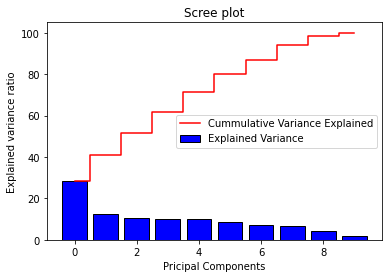

In [27]:
## Scree Plot
plt.bar(range(10), var_exp, align='center', color='blue', edgecolor='black', label='Explained Variance')
plt.step(range(10), cum_var_exp, where='mid', color='red', label='Cummulative Variance Explained')
plt.xlabel('Pricipal Components')
plt.ylabel('Explained variance ratio')
plt.title('Scree plot')
plt.legend(loc='best')
plt.show()

The number of PCA components to be used is 8 as it explains 93.80 percent of variance in the data

# 16. Apply K-means clustering and segment the data (Use PCA transformed data for clustering)

In [28]:
# Using scikit learn principal component analysis method
pca=PCA(n_components=8)

pca_df=pd.DataFrame(pca.fit_transform(scaled_features_df),columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8'])
pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,2.400155,-0.158359,0.173616,1.144961,-0.710607,0.848982,0.096911,-0.662632
1,-1.685353,1.035254,-0.631526,1.211321,-0.192947,1.249851,0.506366,0.066299
2,1.153913,-0.282523,0.102553,-0.793783,0.714669,0.729036,-0.902543,-0.673988
3,-1.783079,-1.119112,-0.444958,-0.785361,0.587718,-0.323594,-0.389894,0.057251
4,0.010566,0.590941,0.817011,-0.838955,-0.982988,-1.680099,-0.762159,0.594821


In [29]:
pd.Series(pca.explained_variance_ratio_).cumsum()*100

0    28.269916
1    40.831475
2    51.340127
3    61.489025
4    71.451859
5    79.831258
6    87.029501
7    93.911645
dtype: float64

In [30]:
# Finding optimal K value by Kmeans clustering using Elbow plot
cluster_errors = []
cluster_range = range(2,10)
for num_clusters in cluster_range:
    clusters = KMeans(num_clusters,random_state=100)
    clusters.fit(pca_df)
    cluster_errors.append(clusters.inertia_)

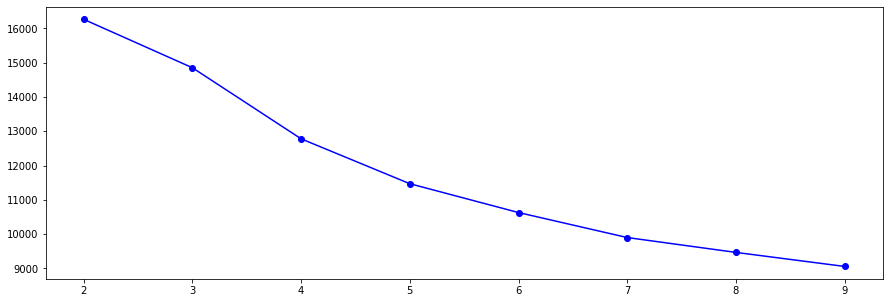

In [31]:
# Creating a dataframe for number of clusters and cluster errors
cluster_df = pd.DataFrame({'num_clusters':cluster_range,'cluster_errors':cluster_errors})

# Elbow plot
plt.figure(figsize=[15,5])
plt.plot(cluster_df['num_clusters'],cluster_df['cluster_errors'],marker='o',color='b')
plt.show()

In [32]:
# Applying KMeans clustering for  the optimal number of cluster obtained above.
kmeans = KMeans(n_clusters=3,random_state=100)
kmeans.fit(pca_df)

KMeans(n_clusters=3, random_state=100)

In [33]:
# Creating a dataframe of the labels
label=pd.DataFrame(kmeans.labels_,columns=['Label'])

In [34]:
df['label'] = label

In [35]:
df['label'].value_counts(normalize=True)*100

2    51.205357
1    38.214286
0    10.580357
Name: label, dtype: float64

In [36]:
df[df['label'] == 2]['Income'].mean()

35852.9644878808

In [37]:
df[df['label'] == 1]['Income'].mean()

66609.64633432723

In [38]:
df[df['label'] == 0]['Income'].mean()

79715.76161479992

In [39]:
# Joining the label dataframe to the pca_df dataframe
kmeans_df = pca_df.join(label)
kmeans_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,Label
0,2.400155,-0.158359,0.173616,1.144961,-0.710607,0.848982,0.096911,-0.662632,1
1,-1.685353,1.035254,-0.631526,1.211321,-0.192947,1.249851,0.506366,0.066299,2
2,1.153913,-0.282523,0.102553,-0.793783,0.714669,0.729036,-0.902543,-0.673988,1
3,-1.783079,-1.119112,-0.444958,-0.785361,0.587718,-0.323594,-0.389894,0.057251,2
4,0.010566,0.590941,0.817011,-0.838955,-0.982988,-1.680099,-0.762159,0.594821,1


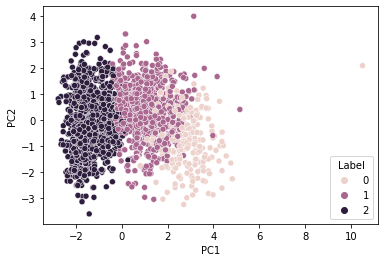

In [40]:
# Visualizing the clusters formed
sns.scatterplot(kmeans_df['PC1'],kmeans_df['PC2'],hue='Label',data=kmeans_df)
plt.show()

# 17. Apply Agglomerative clustering and segment the data (Use Original data for clustering), and perform cluster analysis by doing bivariate analysis between the cluster label and different features and write your observations.

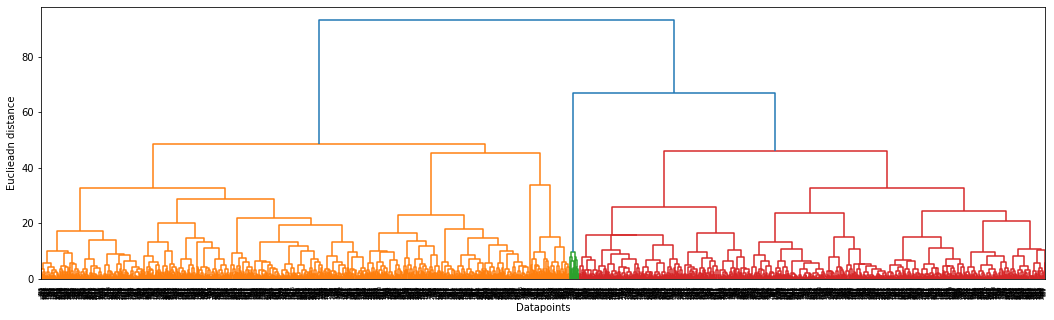

In [41]:
# Plotting the Dendrogram
plt.figure(figsize=[18,5])
merg=linkage(scaled_features,method='ward')
dendrogram(merg,leaf_rotation=90,)
plt.xlabel('Datapoints')
plt.ylabel('Euclieadn distance')
plt.show()

In [42]:
# Calculating the Silhouette score
for i in range(2,15):
    hier=AgglomerativeClustering(n_clusters=i)
    hier=hier.fit(scaled_features_df)
    labels=hier.fit_predict(scaled_features_df)
    print(i,silhouette_score(scaled_features_df,labels))

2 0.1953269278987601
3 0.20313571826900448
4 0.17395958717234267
5 0.14508245902819655
6 0.1553784680322984
7 0.1552619383470093
8 0.12893536402180128
9 0.11723007378493817
10 0.11995018104860722
11 0.1182900137805396
12 0.12042291646023351
13 0.11544079815492278
14 0.11642326253333647


From the Dendrogram as well as the Silhouette score for the various clusters, the highest score is for 3 clusters

In [43]:
# Building hierarchical clustering model using the optimal clusters as 3 using original data.
hie_cluster= AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
hie_cluster_model=hie_cluster.fit(scaled_features_df)

In [44]:
# Creating  a dataframe of the labels
df_label1=pd.DataFrame(hie_cluster_model.labels_,columns=['Labels'])
df_label1.head(5)

,Labels
0,0
1,1
2,0
3,1
4,0


In [45]:
# joining the label dataframe with unscaled initial cleaned dataframe.
df_hier=df.join(df_label1)
df_hier.head()

,Education,Marital_Status,Income,Recency,Complain,Total_Expenses,Num_Total_Purchases,Kids,TotalAcceptedCmp,age,label,Labels
0,2,0,58138.0,58,0,1617,25,0,1,65,1,0
1,2,0,46344.0,38,0,27,6,2,0,68,2,1
2,2,1,71613.0,26,0,776,21,0,0,57,1,0
3,2,1,26646.0,26,0,53,8,1,0,38,2,1
4,4,1,58293.0,94,0,422,19,1,0,41,1,0


**Visualization and Interpretation of results**

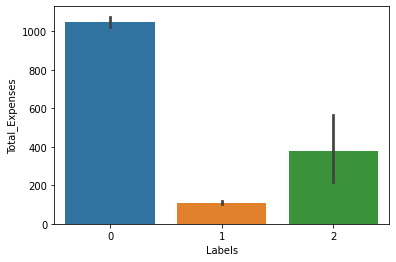

In [46]:
sns.barplot(df_hier['Labels'],df_hier['Total_Expenses'])
plt.show()

 Total Expenses is much higher for cluster 0 as compared to cluster 1 and 2

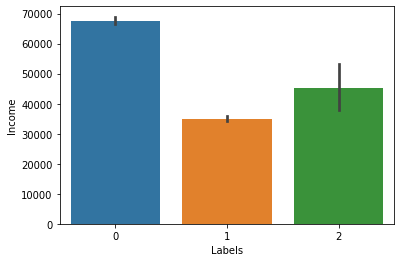

In [47]:
sns.barplot(df_hier['Labels'],df_hier['Income'])
plt.show()

Income is also higher for cluster 0 followed by cluster 2

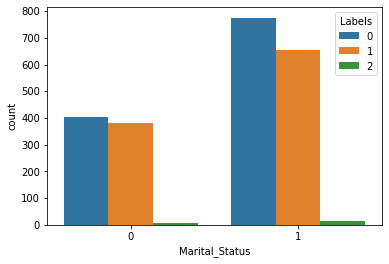

In [48]:
sns.countplot(df_hier['Marital_Status'],hue='Labels',data=df_hier)
plt.show()

We also observe that most of the customers who are in a relationship fall under cluster 0

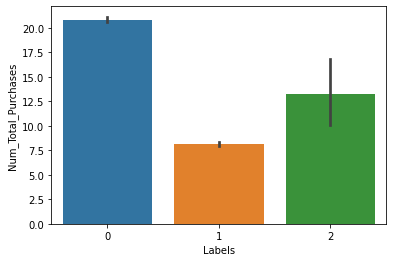

In [49]:
sns.barplot(df_hier['Labels'],df_hier['Num_Total_Purchases'])
plt.show()

The total number of purchases is also higher for cluster 0 as compared to cluster 1 and 2

**Conclusion**
- Customers belonging to cluster 0 do maximum purchases, have maximum spending and have maximum income.

- Where as customers belonging to cluster 1 have the least total expenses and do minimum purchases compared to other two clusters.

- Customers belonging to cluster 2 do average purchases and have average income.